In [1]:
from mtcnn import MTCNN
import cv2
import os 
import matplotlib.pyplot as plt

def imshow(tit, image) :
    plt.title(tit)    
    if image.shape[-1] == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

Using TensorFlow backend.


In [8]:
def face_detection(img):
    
    detector = MTCNN()
    results = detector.detect_faces(img)
    
    if results is not None:
        for result in results:
            faces = result['box']
            # x, y, width, height
            x, y, w, h = faces
            cv2.rectangle(img, (x, y), (x + w, y + h), (100, 0, 100), 3)

            left_eye = result['keypoints']['left_eye']
            right_eye = result['keypoints']['right_eye']
            nose = result['keypoints']['nose']
            mouth_left = result['keypoints']['mouth_left']
            mouth_right = result['keypoints']['mouth_right']
            circle = [left_eye, right_eye, nose, mouth_left, mouth_right]

            for center in circle:
                cv2.circle(img, center, 10, (100, 0, 100), -1)


        img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        savepath = f"./images/1_3.{filename}"

        cv2.imwrite(savepath, img) 
        imshow('',img)
    else:
        print('Face not Found')

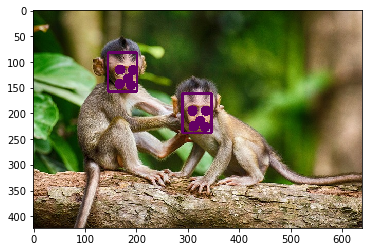

In [13]:
img_path = '../images/monkey2.jpg'
face_detection(img_path)

In [5]:
old_dir = '../data/ordinary/lfw_10'
new_dir = '../data/ordinary/lfw_align_112'

In [6]:
old_dir_list = os.listdir(old_dir)
len(old_dir_list)

11

In [11]:
detector = MTCNN()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



lfw_10
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\lfw_10'
Aaron_Eckhart
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Eckhart'


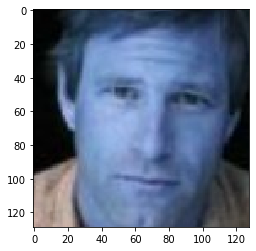

Aaron_Guiel
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Guiel'


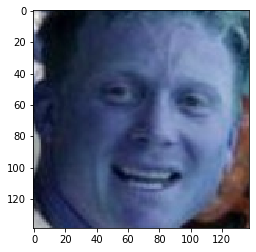

Aaron_Patterson
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Patterson'


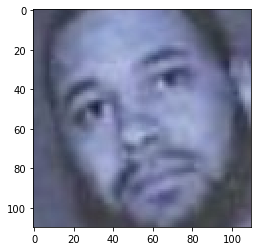

Aaron_Peirsol
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Peirsol'


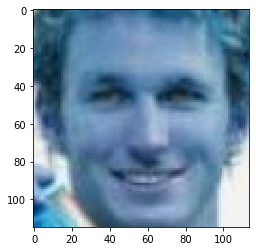

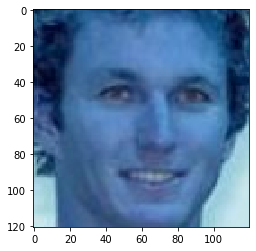

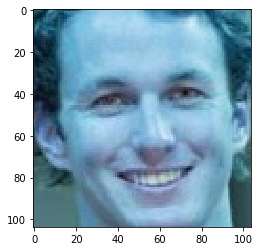

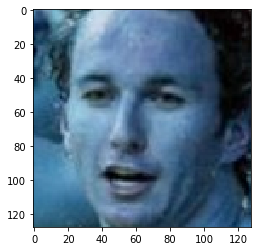

Aaron_Pena
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Pena'


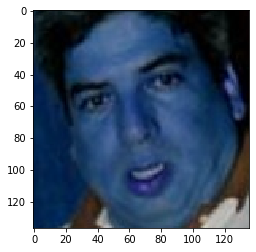

Aaron_Sorkin
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Sorkin'


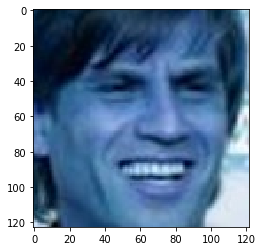

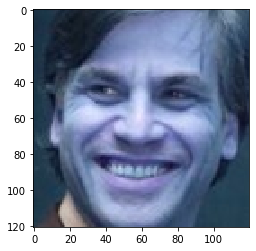

Aaron_Tippin
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Aaron_Tippin'


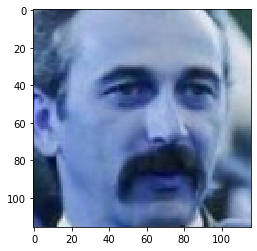

Abbas_Kiarostami
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Abbas_Kiarostami'


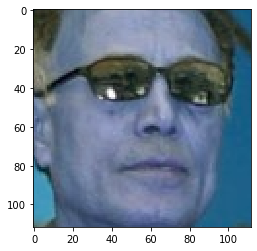

Abba_Eban
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Abba_Eban'


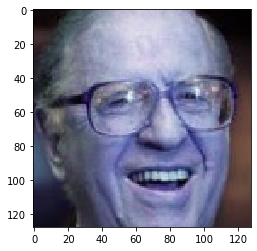

Abdel_Aziz_Al-Hakim
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Abdel_Aziz_Al-Hakim'


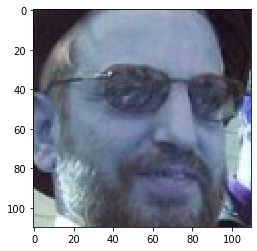

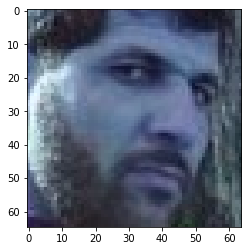

Abdel_Madi_Shabneh
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: '../data/ordinary/lfw_align_112\\Abdel_Madi_Shabneh'


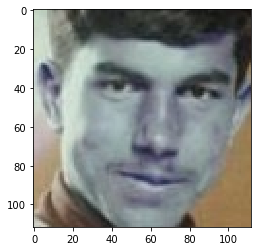

In [26]:
for root, dirs, files in os.walk(old_dir):
#     print(dirs)
    people_name = os.path.split(root)[1]
    print(people_name)
    new_people_dir = os.path.join(new_dir, people_name)
    try:
        os.mkdir(new_people_dir)
    except Exception as err:
        print(err)
        
    for i, file in enumerate(files):
        input_image_path = os.path.join(root, file)
        original_image = cv2.imread(input_image_path, 1)
        if original_image is not None:
            original_image= cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            copy_image = original_image
#             face_locations = face_recognition.face_locations(original_image)
            face_locations = detector.detect_faces(original_image)
            
            for face_location in face_locations:
                # more bigger box size than ordinary box
                x, y, w, h = face_location['box']
                left = x
                top = y
                right = x + w
                bottom = y + h
                x_center= left + int(w/2)
                left = x_center - int(h/2)
                right = x_center + int( h/2)
                
                    
                crop_image = copy_image[top:bottom, left:right]
                imshow('', crop_image)                
                resize_image = cv2.resize(crop_image, dsize=(112,112), interpolation = cv2.INTER_AREA)
                resize_image = cv2.cvtColor(resize_image, cv2.COLOR_RGB2BGR)
                save_path = f"{new_dir}/{people_name}/{file}"
                cv2.imwrite(save_path, resize_image)